In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [5]:
data_train.columns

Index(['id', 'loanAmnt', 'term', 'interestRate', 'installment', 'grade',
       'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership',
       'annualIncome', 'verificationStatus', 'issueDate', 'isDefault',
       'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years',
       'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec',
       'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc',
       'initialListStatus', 'applicationType', 'earliesCreditLine', 'title',
       'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8',
       'n9', 'n10', 'n11', 'n12', 'n13', 'n14'],
      dtype='object')

In [6]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [7]:
data_train.describe()

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [8]:
data_train.head(10).append(data_train.tail(10))

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0
5,5,11000.0,3,7.99,344.65,A,A5,51727.0,7 years,0,...,1.0,48.0,2.0,3.0,2.0,19.0,0.0,0.0,0.0,0.0
6,6,2050.0,3,7.69,63.95,A,A4,180083.0,9 years,0,...,11.0,3.0,10.0,18.0,3.0,12.0,0.0,0.0,0.0,3.0
7,7,11500.0,3,14.98,398.54,C,C3,214017.0,1 year,1,...,16.0,10.0,5.0,21.0,4.0,8.0,0.0,0.0,0.0,2.0
8,8,12000.0,3,12.99,404.27,C,C2,188.0,5 years,2,...,7.0,2.0,13.0,17.0,11.0,15.0,NaN,0.0,0.0,6.0
9,9,6500.0,3,10.99,212.78,B,B4,54.0,NaN,1,...,21.0,24.0,6.0,39.0,5.0,7.0,0.0,0.0,0.0,8.0


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

Exploring missing values

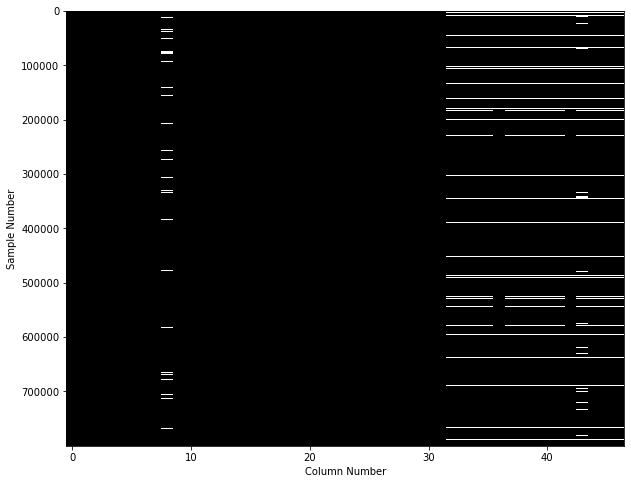

In [10]:
# import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data_train.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [11]:
NANs = data_train.isnull().sum()
NANs

id                        0
loanAmnt                  0
term                      0
interestRate              0
installment               0
grade                     0
subGrade                  0
employmentTitle           1
employmentLength      46799
homeOwnership             0
annualIncome              0
verificationStatus        0
issueDate                 0
isDefault                 0
purpose                   0
postCode                  1
regionCode                0
dti                     239
delinquency_2years        0
ficoRangeLow              0
ficoRangeHigh             0
openAcc                   0
pubRec                    0
pubRecBankruptcies      405
revolBal                  0
revolUtil               531
totalAcc                  0
initialListStatus         0
applicationType           0
earliesCreditLine         0
title                     1
policyCode                0
n0                    40270
n1                    40270
n2                    40270
n3                  

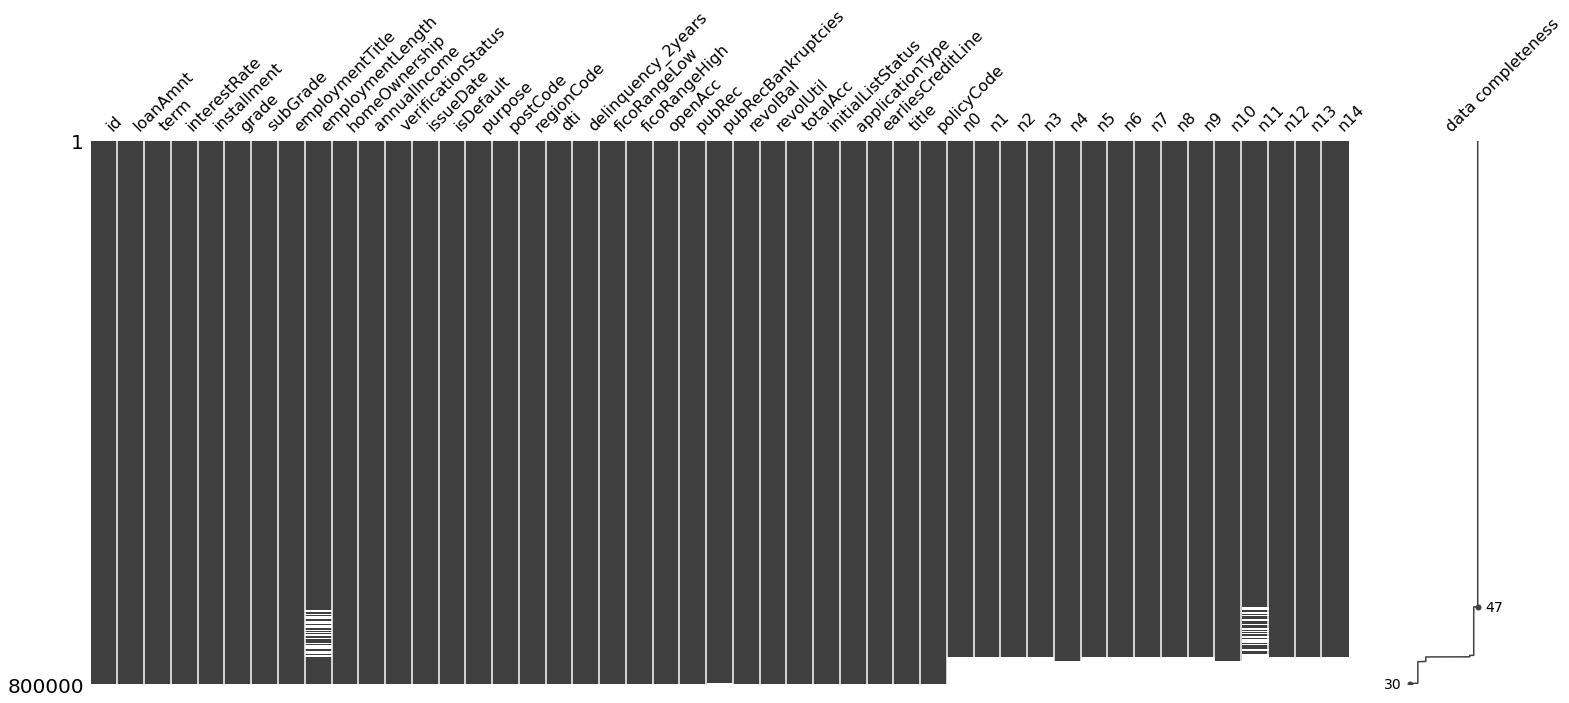

In [12]:
import missingno as msno

msno.matrix(data_train, labels=True, sort="descending");

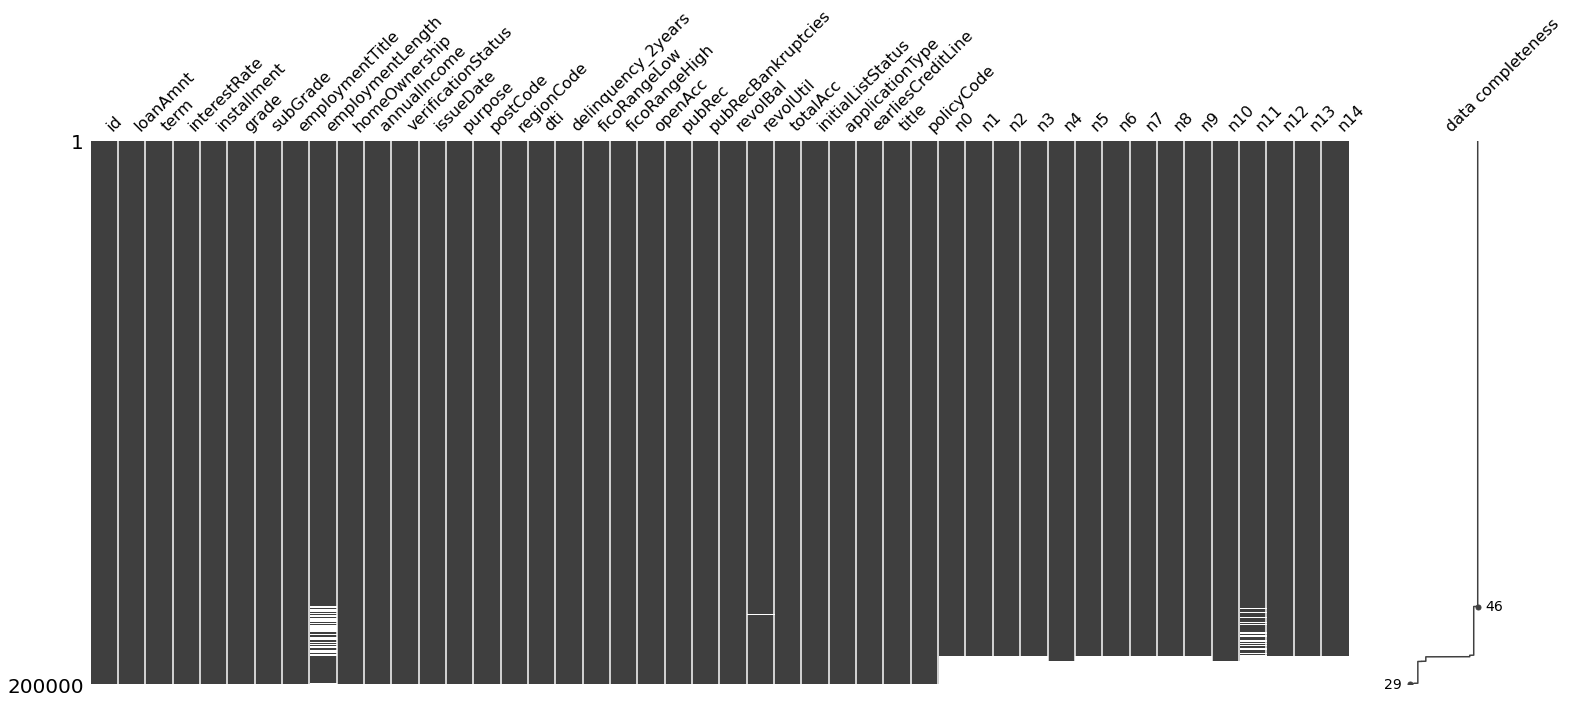

In [13]:
import missingno as msno

msno.matrix(data_test, labels=True, sort="descending");

In [14]:
# Check number of duplicates of unique identifer, which is the borrower id in the dataset
n_duplicates = data_train.drop(labels=["id"], axis=1).duplicated().sum()
n_duplicates

0

In [15]:
# Check number of duplicates of unique identifer, which is the borrower id in the dataset
n_duplicates = data_test.drop(labels=["id"], axis=1).duplicated().sum()
n_duplicates

0

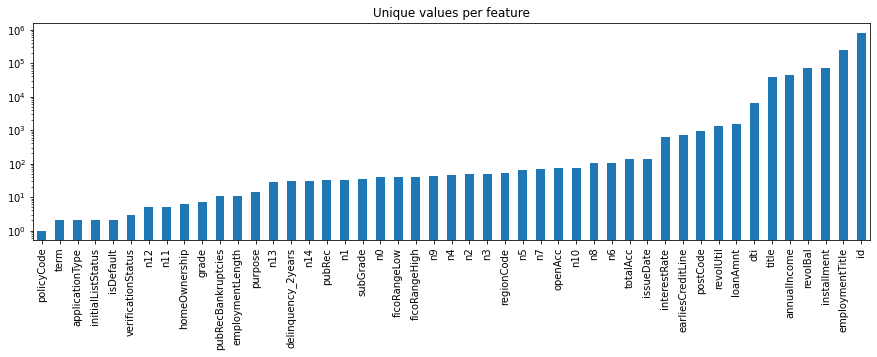

In [16]:
unique_values_train = data_train.nunique().sort_values()
unique_values_train.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");


In [17]:
#  looking for unique values in the training set to be deleted
unique_value_fea_drop = [col for col in data_train.columns if data_train[col].nunique() <= 1]

print(unique_value_fea_drop)

['policyCode']


In [18]:
data_train['policyCode'].value_counts() 

1.0    800000
Name: policyCode, dtype: int64

In [19]:
data_train=data_train.drop(['policyCode'],axis=1)

In [20]:
print(data_train.shape)

(800000, 46)


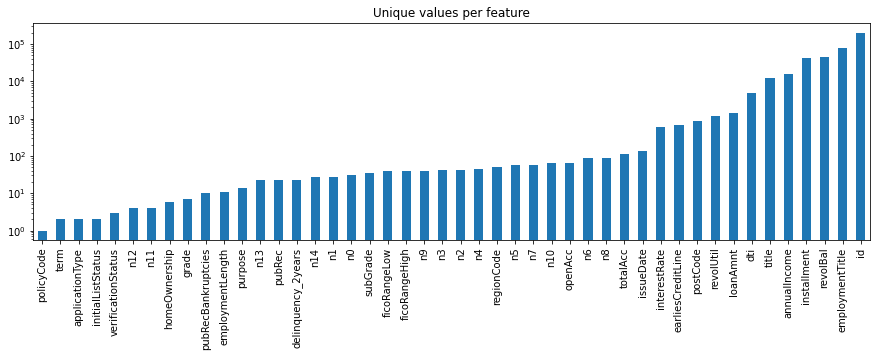

In [21]:
unique_values_test = data_test.nunique().sort_values()
unique_values_test.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [22]:
unique_value_fea_test_drop = [col for col in data_test.columns if data_test[col].nunique() <= 1]


In [23]:

print(unique_value_fea_test_drop)

['policyCode']


In [24]:
data_test['policyCode'].value_counts() 

1.0    200000
Name: policyCode, dtype: int64

In [25]:
data_test= data_test.drop(['policyCode'],axis=1)

In [26]:
print(data_test.shape)

(200000, 45)


In [27]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

In [29]:
data_train.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

In [ ]:
data_train.describe(exclude=["object"])

,id,loanAmnt,term,interestRate,installment,employmentTitle,homeOwnership,annualIncome,verificationStatus,isDefault,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,799999.000000,800000.000000,8.000000e+05,800000.000000,800000.000000,...,759730.000000,759730.000000,759730.000000,759729.000000,759730.000000,766761.000000,730248.000000,759730.000000,759730.000000,759730.000000
mean,399999.500000,14416.818875,3.482745,13.238391,437.947723,72005.351714,0.614213,7.613391e+04,1.009683,0.199513,...,8.107937,8.575994,8.282953,14.622488,5.592345,11.643896,0.000815,0.003384,0.089366,2.178606
std,230940.252015,8716.086178,0.855832,4.765757,261.460393,106585.640204,0.675749,6.894751e+04,0.782716,0.399634,...,4.799210,7.400536,4.561689,8.124610,3.216184,5.484104,0.030075,0.062041,0.509069,1.844377
min,0.000000,500.000000,3.000000,5.310000,15.690000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,199999.750000,8000.000000,3.000000,9.750000,248.450000,427.000000,0.000000,4.560000e+04,0.000000,0.000000,...,5.000000,4.000000,5.000000,9.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000
50%,399999.500000,12000.000000,3.000000,12.740000,375.135000,7755.000000,1.000000,6.500000e+04,1.000000,0.000000,...,7.000000,7.000000,7.000000,13.000000,5.000000,11.000000,0.000000,0.000000,0.000000,2.000000
75%,599999.250000,20000.000000,3.000000,15.990000,580.710000,117663.500000,1.000000,9.000000e+04,2.000000,0.000000,...,11.000000,11.000000,10.000000,19.000000,7.000000,14.000000,0.000000,0.000000,0.000000,3.000000
max,799999.000000,40000.000000,5.000000,30.990000,1715.420000,378351.000000,5.000000,1.099920e+07,2.000000,1.000000,...,70.000000,132.000000,79.000000,128.000000,45.000000,82.000000,4.000000,4.000000,39.000000,30.000000


In [ ]:
data_train.describe(exclude=["number","datetime"])

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
count,800000,800000,753201,800000,800000
unique,7,35,11,139,720
top,B,C1,10+ years,2016-03-01,Aug-2001
freq,233690,50763,262753,29066,5567


In [ ]:
# select the numerical features from training set
num_features = list(data_train.select_dtypes(exclude=['object']).columns)



In [ ]:
df_num_features =data_train.select_dtypes(exclude=['object'])

In [ ]:
# df_num_features.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
#           figsize=(15, 30), markersize=1);

In [ ]:
data_train.describe(exclude=["number", "datetime"])

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
count,800000,800000,753201,800000,800000
unique,7,35,11,139,720
top,B,C1,10+ years,2016-03-01,Aug-2001
freq,233690,50763,262753,29066,5567


Exploring the categorical features

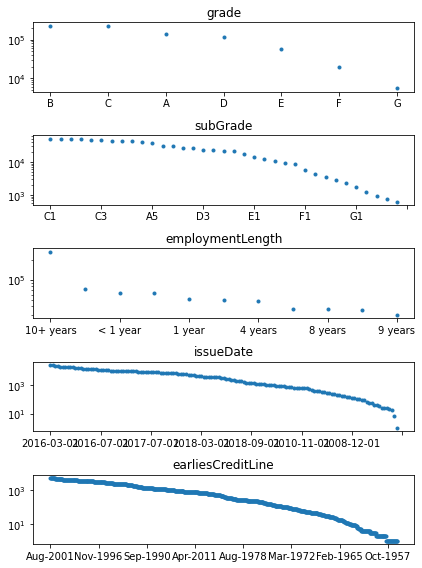

In [ ]:
# Create figure object with 5 subplots
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(6, 8))

# Identify non-numerical features
df_categorical = data_train.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_categorical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_categorical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [ ]:
# select the categorical features from training set
cat_features = list(filter(lambda x: x not in num_features,list(data_train.columns)))

Defining continuous and discreet or ordinal features

In [ ]:
def get_num_continuous_features(data,features):
    num_continuous_features = []
    num_discreet_features = []
    for i in features:
        temp = data[i].nunique()
        if temp <= 25: ##select features with less than 25 unique features as discrete or ordinal features, and the other features as continuous features.
            num_discreet_features.append(i)
            continue
        num_continuous_features.append(i)
    return num_continuous_features,num_discreet_features
num_continuous_features,num_discreet_features = get_num_continuous_features(data_train,num_features)


In [ ]:
df_num_continous_features = data_train[[*num_continuous_features]]
df_num_continous_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   employmentTitle     799999 non-null  float64
 5   annualIncome        800000 non-null  float64
 6   postCode            799999 non-null  float64
 7   regionCode          800000 non-null  int64  
 8   dti                 799761 non-null  float64
 9   delinquency_2years  800000 non-null  float64
 10  ficoRangeLow        800000 non-null  float64
 11  ficoRangeHigh       800000 non-null  float64
 12  openAcc             800000 non-null  float64
 13  pubRec              800000 non-null  float64
 14  revolBal            800000 non-null  float64
 15  revolUtil           799469 non-nul

In [ ]:
num_continuous_features

['id',
 'loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [ ]:
num_discreet_features

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'purpose',
 'pubRecBankruptcies',
 'initialListStatus',
 'applicationType',
 'n11',
 'n12']

In [ ]:
categorical_columns=cat_features+num_discreet_features


NameError: name 'cat_features' is not defined

Exploration of numerical continuous features

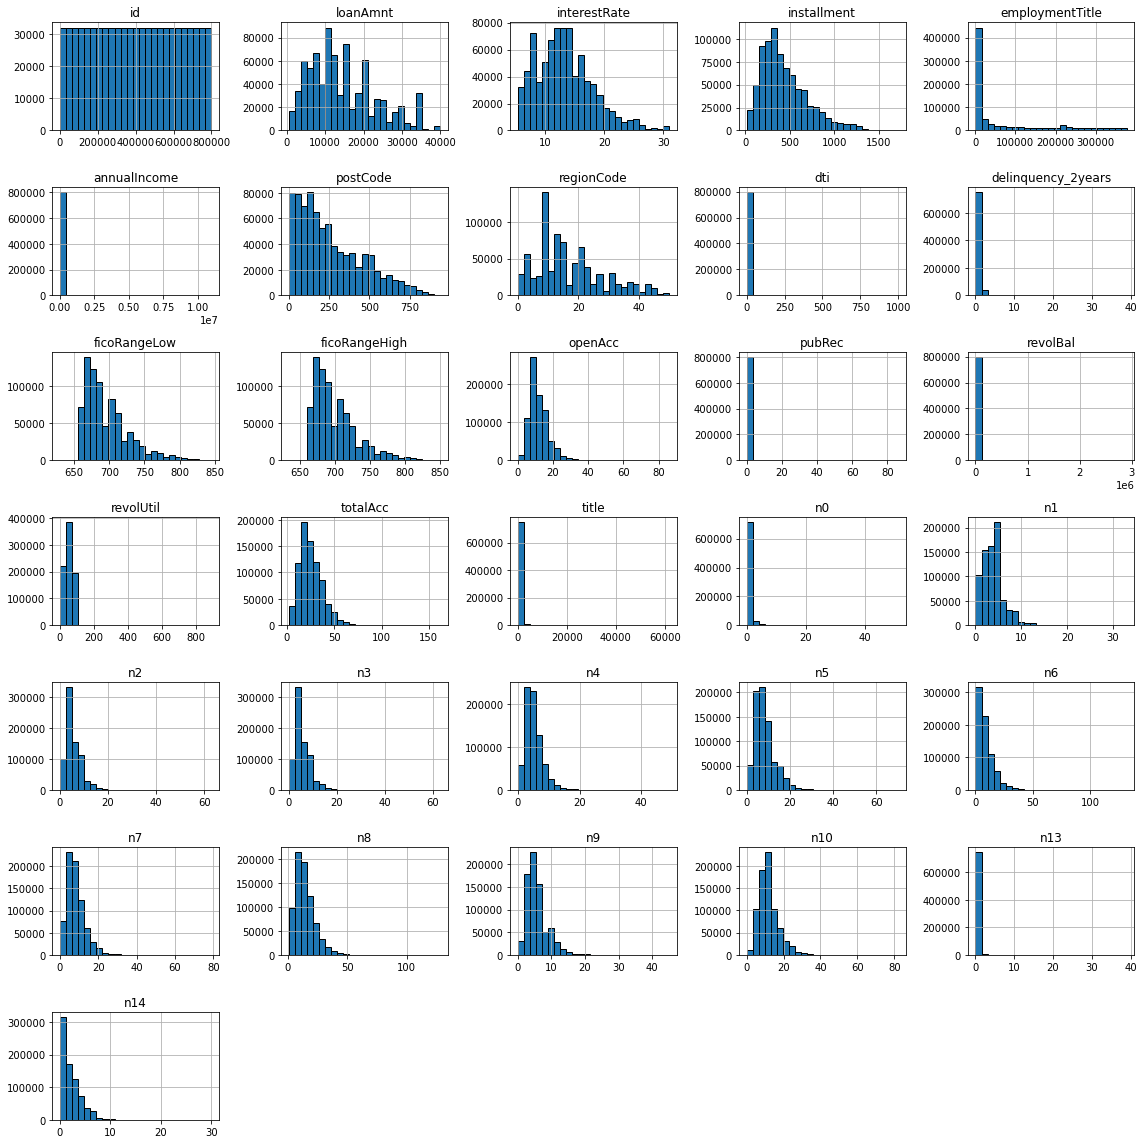

In [ ]:
df_num_continous_features.hist(bins=25, figsize=(16, 16), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
df_num_continous_features.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
id,-2.234765e-15,-1.200000
loanAmnt,7.826221e-01,-0.083396
interestRate,7.123646e-01,0.502096
installment,1.006328e+00,0.746771
employmentTitle,1.379124e+00,0.549221
annualIncome,4.618773e+01,4902.030313
postCode,8.321358e-01,-0.142637
regionCode,7.824390e-01,-0.029996
dti,2.730132e+01,2153.797880
delinquency_2years,5.685041e+00,62.266464


In [ ]:
# # Collects for each feature the most frequent entry
# most_frequent_entry = data_train.mode()

# # Checks for each entry if it contains the most frequent entry
# df_freq = data_train.eq(most_frequent_entry.values, axis=1)

# # Computes the mean of the 'is_most_frequent' occurrence
# df_freq = data_train.mean().sort_values(ascending=False)

# # Show the 5 top features with the highest ratio of singular value content
# display(df_freq.head())

# # Visualize the 'df_freq' table
# df_freq.plot.bar(figsize=(15, 4));

In [ ]:
data_test.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,issueDateDT
0,14000.0,3,10.99,458.28,B,B3,7027.0,10+ years,0,80000.0,...,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0,2587
1,20000.0,5,14.65,472.14,C,C5,60426.0,10+ years,0,50000.0,...,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0,1888
2,12000.0,3,19.99,445.91,D,D4,23547.0,2 years,1,60000.0,...,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0,3044
3,17500.0,5,14.31,410.02,C,C4,636.0,4 years,0,37000.0,...,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0,2983
4,35000.0,3,17.09,1249.42,D,D1,368446.0,< 1 year,1,80000.0,...,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0,3196


In [ ]:
##datetime transform of training set
data_train['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_train['issueDateDT'] = data_train['issueDate'].apply(lambda x: x-startdate).dt.days

In [ ]:
##datetime transform of test set

data_test['issueDate'] = pd.to_datetime(data_train['issueDate'],format='%Y-%m-%d')
startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
data_test['issueDateDT'] = data_test['issueDate'].apply(lambda x: x-startdate).dt.days

Feature engineering

In [ ]:
num_type=list(data_train.select_dtypes(exclude=['object']).columns)
cls_type=list(data_train.select_dtypes(include=['object']).columns)
e ='isDefault'
num_type.remove(e)

In [ ]:
#separate the target y from the training set
data_target =data_train['isDefault']
data_train.drop('isDefault',axis=1,inplace=True)
#fill missing value with mean for num types
data_train[num_type]=data_train[num_type].fillna(data_train[num_type].mean())
#fill missing value with mode for cls types
data_train[cls_type]=data_train[cls_type].fillna(data_train[cls_type].mode())
data_train[cls_type].isnull().sum()
data_train['employmentLength'].fillna('10+ years',inplace=True)

In [ ]:
## do the same to test data
data_test[num_type]=data_test[num_type].fillna(data_test[num_type].mean())
data_test[cls_type]=data_test[cls_type].fillna(data_test[cls_type].mode())
data_test['employmentLength']=data_test['employmentLength'].fillna('10+ years')

In [ ]:
## drop id in training and test set
data_train.drop(['id'],axis=1,inplace=True)
data_test.drop(['id'],1,inplace=True)

In [ ]:
## combing the training and test set
combined=data_train.append(data_test)

In [ ]:
# check combined shape
combined.shape

(1000000, 45)

In [ ]:
combined.to_csv('data.csv')

In [ ]:
combined =pd.read_csv('data.csv')

In [ ]:
combined.isnull().any().sum()

0

In [ ]:
df_num_features_combined =combined.select_dtypes(exclude=['object'])

In [ ]:
df_num_features_combined.skew()

Unnamed: 0             0.332180
loanAmnt               0.783099
term                   1.209453
interestRate           0.712370
installment            1.006985
employmentTitle        1.376746
homeOwnership          0.674994
annualIncome          47.911286
verificationStatus    -0.017177
purpose                1.251763
postCode               0.833024
regionCode             0.781124
dti                   28.013440
delinquency_2years     5.692038
ficoRangeLow           1.285709
ficoRangeHigh          1.285909
openAcc                1.294349
pubRec                13.135209
pubRecBankruptcies     3.478264
revolBal              15.136870
revolUtil             -0.026238
totalAcc               0.952496
initialListStatus      0.337122
applicationType        6.986739
title                  5.216776
n0                     5.196277
n1                     1.440841
n2                     1.581425
n3                     1.581425
n4                     1.752934
n5                     1.377558
n6      

In [ ]:
def dummies_coder():
    global combined
    for name in ['term','grade','subGrade',
                 'employmentLength','verificationStatus']:
        data_dummies = pd.get_dummies(combined[name],prefix=name)
        combined = pd.concat([combined,data_dummies],axis=1)
        combined.drop(name,axis=1,inplace=True)
    return combined
combined.shape

(1000000, 46)

In [ ]:
combined['debt']=combined['annualIncome'] *combined['dti']
combined.drop(['annualIncome','dti'],1,inplace=True)
combined.shape

(1000000, 45)

In [ ]:
combined['loanInstallments']=(combined['loanAmnt'] *combined['interestRate']*combined['term']+combined['loanAmnt'])/combined['installment']
combined.drop(['loanAmnt','interestRate','term','installment'],1,inplace=True)
combined.shape

(1000000, 42)

In [ ]:
combined['Credit_record'] = combined['delinquency_2years']+combined['pubRec']-combined['pubRecBankruptcies']
combined.drop(['delinquency_2years','pubRec','pubRecBankruptcies'],1,inplace=True)

In [ ]:
combined.shape

(1000000, 40)

In [ ]:
combined['total_credit_exposure'] =combined['openAcc']+combined['totalAcc']+combined['revolBal']+combined['revolUtil']
combined.drop(['openAcc','totalAcc','revolBal','revolUtil'],1,inplace=True)

In [ ]:
combined.shape

(1000000, 37)

In [ ]:
combined['ficoRange'] = combined['ficoRangeHigh'] +combined['ficoRangeLow']
combined.drop(['ficoRangeHigh','ficoRangeLow'],1,inplace=True)

In [ ]:
combined.shape

(1000000, 36)

In [ ]:
# combined['issueDate'] = combined['issueDate'].apply(lambda x: x.strftime('%Y-%m-%d'))


In [ ]:
combined['total_n']=combined['n0']+combined['n1']+combined['n2']+combined['n3']+combined['n4']+combined['n5']+combined['n6']+combined['n7']+combined['n8']+combined['n9']+combined['n10']+combined['n11']+combined['n12']+combined['n13']+combined['n14']
combined.drop(['n0','n1', 'n2','n3' ,'n4' ,'n5' ,'n6' ,'n7' ,'n8' ,'n9' ,'n10' ,
               'n11' ,'n12' ,'n13' , 'n14'],1,inplace=True)
combined.shape

(1000000, 22)

In [ ]:
df_num_features_combined =combined.select_dtypes(exclude=['object'])
df_num_features_combined.skew()


Unnamed: 0                0.332180
employmentTitle           1.376746
homeOwnership             0.674994
verificationStatus       -0.017177
purpose                   1.251763
postCode                  0.833024
regionCode                0.781124
initialListStatus         0.337122
applicationType           6.986739
title                     5.216776
issueDateDT              -0.650261
debt                      2.256121
loanInstallments          1.276123
Credit_record             6.559703
total_credit_exposure    15.120231
ficoRange                 1.285808
total_n                   1.211760
dtype: float64

In [ ]:
# combined['title']=np.log2(combined['title'] +1)

In [ ]:
# combined['Credit_record']=np.log2(combined['Credit_record'] +1)

In [ ]:
combined['total_credit_exposure']=np.log2(combined['total_credit_exposure'] +1)

In [ ]:
combined.skew()

Unnamed: 0               0.332180
employmentTitle          1.376746
homeOwnership            0.674994
verificationStatus      -0.017177
purpose                  1.251763
postCode                 0.833024
regionCode               0.781124
initialListStatus        0.337122
applicationType          6.986739
title                    5.216776
issueDateDT             -0.650261
debt                     2.256121
loanInstallments         1.276123
Credit_record            6.559703
total_credit_exposure   -1.403975
ficoRange                1.285808
total_n                  1.211760
dtype: float64

In [ ]:
train=combined.iloc[:800000]
test=combined.iloc[800000:]
target=pd.read_csv('train.csv',usecols=['isDefault'])['isDefault'].values

In [ ]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 800000 to 999999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             200000 non-null  int64  
 1   grade                  200000 non-null  object 
 2   subGrade               200000 non-null  object 
 3   employmentTitle        200000 non-null  float64
 4   employmentLength       200000 non-null  object 
 5   homeOwnership          200000 non-null  int64  
 6   verificationStatus     200000 non-null  int64  
 7   issueDate              200000 non-null  object 
 8   purpose                200000 non-null  int64  
 9   postCode               200000 non-null  float64
 10  regionCode             200000 non-null  int64  
 11  initialListStatus      200000 non-null  int64  
 12  applicationType        200000 non-null  int64  
 13  earliesCreditLine      200000 non-null  object 
 14  title                  200000 n

In [ ]:
# train = train.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
# test = test.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
train.isnull().sum().any()

False

In [ ]:
test.isnull().sum().any()

False

In [ ]:
train.describe()
test.describe()

,Unnamed: 0,employmentTitle,homeOwnership,verificationStatus,purpose,postCode,regionCode,initialListStatus,applicationType,title,issueDateDT,debt,loanInstallments,Credit_record,total_credit_exposure,ficoRange,total_n
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,99999.500000,72435.750740,0.614100,1.010430,1.744410,258.259535,16.430830,0.416650,0.019465,1778.180570,2926.542585,1.285122e+06,1648.850977,0.396132,13.306027,1396.332930,79.167798
std,57735.171256,106892.374933,0.675465,0.781732,2.367497,199.752214,11.061279,0.493005,0.138153,7983.247915,590.998424,8.672871e+05,1044.568063,0.996374,1.584686,63.705846,33.494488
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000e+00,562.084993,-0.135293,2.000000,1254.000000,6.000000
25%,49999.750000,420.000000,0.000000,0.000000,0.000000,103.000000,8.000000,0.000000,0.000000,0.000000,2587.000000,7.042119e+05,959.893380,0.000000,12.555542,1344.000000,56.000000
50%,99999.500000,7836.000000,1.000000,1.000000,0.000000,203.000000,14.000000,0.000000,0.000000,2.000000,2983.000000,1.112250e+06,1222.162189,0.000000,13.455571,1384.000000,76.000000
75%,149999.250000,119739.250000,1.000000,2.000000,4.000000,392.000000,22.000000,1.000000,0.000000,5.000000,3318.000000,1.662172e+06,1854.480470,0.000000,14.279250,1424.000000,96.000000
max,199999.000000,378338.000000,5.000000,2.000000,13.000000,931.000000,50.000000,1.000000,1.000000,61676.000000,4201.000000,3.452900e+07,6515.146534,61.000000,20.733459,1695.000000,494.000000


In [ ]:
# combined=combined.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [ ]:
# combined[combined==np.inf]=np.nan
# combined.fillna(combined.mean(), inplace=True)

Modelling

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


## Use skcikit-learn  LabelEncoder for ordinal encoding for solving loan prediction(bianary problem with 0 and 1)


In [ ]:
    le = preprocessing.LabelEncoder()  # scikit-learn provides the LabelEncoder class specifically for binary classficaition problem, mapping the lables to 0 and 1

    for column_name in train.columns:
        if train[column_name].dtype == object:
            train[column_name] = le.fit_transform(train[column_name])
        else:
            pass

In [ ]:
clf=RandomForestClassifier(n_estimators=50,max_features='sqrt')

In [ ]:
clf =clf.fit(train,target)

Feature: 0, Score: 0.07615
Feature: 1, Score: 0.02347
Feature: 2, Score: 0.04305
Feature: 3, Score: 0.07157
Feature: 4, Score: 0.03567
Feature: 5, Score: 0.01202
Feature: 6, Score: 0.01489
Feature: 7, Score: 0.04667
Feature: 8, Score: 0.01681
Feature: 9, Score: 0.07115
Feature: 10, Score: 0.05355
Feature: 11, Score: 0.00918
Feature: 12, Score: 0.00205
Feature: 13, Score: 0.07202
Feature: 14, Score: 0.02471
Feature: 15, Score: 0.04695
Feature: 16, Score: 0.07625
Feature: 17, Score: 0.09726
Feature: 18, Score: 0.01636
Feature: 19, Score: 0.07620
Feature: 20, Score: 0.04608
Feature: 21, Score: 0.06792


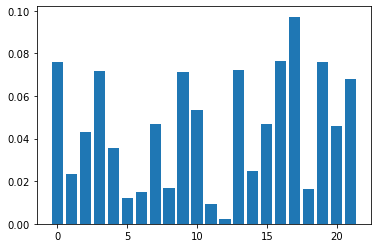

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
model = SelectFromModel(clf,prefit=True)
train_reduce =model.transform(train)
train_reduce.shape

(800000, 12)

In [ ]:
def compute_score(clf,x,y,cv=5,scoring='accuracy'):
    xval =cross_val_score(clf,x,y,cv=5,scoring=scoring)
    return np.mean(xval)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
models = [logreg_cv, rf,gboost]

In [ ]:
train_portion =train[:80000]
target_portion =target[:80000]
for model in models:
    print (f'Cross-validation of :{model.__class__}')
    score = compute_score(clf=model, x=train_portion, y=target_portion, scoring='accuracy')
    print (f'CV score ={score}')
    print ('****')

Cross-validation of :<class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score =0.7974
****
Cross-validation of :<class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score =0.7990375000000001
****
Cross-validation of :<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score =0.7414999999999999
****


hyper-parameter tuning

In [ ]:
model_box= []
rf=RandomForestClassifier(random_state=2021,max_features='auto')
rf_params ={'n_estimators':[50,120,300],'max_depth':[5,8,15],
            'min_samples_leaf':[2,5,10],'min_samples_split':[2,5,10]}
model_box.append([rf,rf_params])

gboost=GradientBoostingClassifier(random_state=2021)
gboost_params ={'learning_rate':[0.05,0.1,0.15],'n_estimators':[10,50],
                'max_depth':[3,4,6,10],'min_samples_split':[50,10]}
model_box.append([gboost,gboost_params])

In [ ]:
 from sklearn.model_selection import GridSearchCV

In [ ]:
for i in range(len(model_box)):
    best_model= GridSearchCV(model_box[i][0],param_grid=model_box[i][1],refit=True,cv=5,scoring='roc_auc').fit(train_portion,target_portion)
    print(model_box[i],':')
    print('best_parameters:',best_model.best_params_) 

[RandomForestClassifier(random_state=2021), {'n_estimators': [50, 120, 300], 'max_depth': [5, 8, 15], 'min_samples_leaf': [2, 5, 10], 'min_samples_split': [2, 5, 10]}] :
best_parameters: {'max_depth': 15, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}
[GradientBoostingClassifier(random_state=2021), {'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': [10, 50], 'max_depth': [3, 4, 6, 10], 'min_samples_split': [50, 10]}] :
best_parameters: {'learning_rate': 0.15, 'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 50}


In [ ]:
model_selected= []
rf=RandomForestClassifier(random_state=2021,max_features='auto')
rf_params ={'n_estimators':[300],'max_depth':[15],
            'min_samples_leaf':[10],'min_samples_split':[2]}
model_selected.append([rf,rf_params])

gboost=GradientBoostingClassifier(random_state=2021)
gboost_params ={'learning_rate':[0.15],'n_estimators':[50],
                'max_depth':[3],'min_samples_split':[50]}
model_selected.append([gboost,gboost_params])

In [ ]:
rf=RandomForestClassifier(random_state=2021,max_features='auto')
rf_params ={'n_estimators':[300],'max_depth':[15],
            'min_samples_leaf':[10],'min_samples_split':[2]}
rf.fit(train_portion,target_portion)
score = cross_val_score(rf,train_portion,target_portion,cv=5,scoring='accuracy')
mean_score = cross_val_score(rf,train_portion,target_portion,cv=5,scoring='accuracy').mean()
std_score = cross_val_score(rf,train_portion,target_portion,cv=5,scoring='accuracy').std()
print (f'CV score ={score}')
print (f'CV score ={mean_score}')
print (f'CV score ={std_score}')

CV score =[0.7984375 0.801375  0.80025   0.798     0.799875 ]
CV score =0.7995875000000001
CV score =0.0012295832627357657


In [ ]:
gboost=GradientBoostingClassifier(random_state=2021)
gboost_params ={'learning_rate':[0.15],'n_estimators':[50],
                'max_depth':[4],'min_samples_split':[50]}
gboost.fit(train_portion,target_portion)
score = cross_val_score(gboost,train_portion,target_portion,cv=5,scoring='accuracy')
mean_score = cross_val_score(gboost, train_portion,target_portion,cv=5,scoring='accuracy').mean()
std_score = cross_val_score(gboost, train_portion,target_portion,cv=5,scoring='accuracy').std()
print (f'CV score ={score}')
print (f'CV score ={mean_score}')
print (f'CV score ={std_score}')

CV score =[0.798     0.800375  0.8028125 0.8015    0.5468125]
CV score =0.7499
CV score =0.10155605441085233


In [ ]:
    le = preprocessing.LabelEncoder()
    for column_name in test.columns:
        if test[column_name].dtype == object:
            test[column_name] = le.fit_transform(test[column_name])
        else:
            pass

In [ ]:
model =model_selected[0]
print(model_selected[0])

## since rf outperforms gboost, rf will be selected as the MODEL.

[RandomForestClassifier(random_state=2021), {'n_estimators': [300], 'max_depth': [15], 'min_samples_leaf': [10], 'min_samples_split': [2]}]


In [ ]:
# model_gboost = GradientBoostingClassifier(random_state=2021,learning_rate =0.15,
#   n_estimators=50,max_depth=4,min_samples_split=50)

output = rf.predict(test)

In [ ]:
# import pickle

In [ ]:
# filename ='best_model'
# pickle.dump(model,open(filename,'wb'))

In [ ]:
# loaded_model = pickle.load(open(filename,'rb'))


In [ ]:
# loaded_model.predict(test)

AttributeError: 'list' object has no attribute 'predict'

In [ ]:
df_output = pd.DataFrame(output)

In [ ]:
orginal_test_set = pd.read_csv('test.csv') 

In [ ]:
df_output['id'] = orginal_test_set ['id']
df_output['isDefault'] = output

In [ ]:
df_output[['id','isDefault']].to_csv('output.csv', index=False)# prediction result saved locally